## Plotting

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
from itertools import product
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (5, 3)  # use for publication
# mpl.rcParams['figure.figsize'] = (9, 6)

sys.path.insert(0, "..")
from omegaconf import OmegaConf
from floral.utils.plotting import (
    MODES, METRICS, INDICES,
    load_runs,
    histories_to_df,
)
PLOTS_DIR = "../plots"
LEGEND_SIZE = 9


# ========== CHOOSE EXPERIMENT ========== #

# ----- Methods Performances ------ #
# run_methods: Clustered datasets
# EXPERIMENT = "run_methods_synthetic_linear"
# EXPERIMENT = "run_methods_synthetic_mlp"
# EXPERIMENT = "run_methods_mnist_rotate"
# EXPERIMENT = "run_methods_mnist_label_shift"
# EXPERIMENT = "run_methods_cifar10_rotate"
# EXPERIMENT = "run_methods_cifar10_label_shift"
# EXPERIMENT = "run_methods_cifar100"
EXPERIMENT = "run_methods_mnist_rotate_reduced"
# EXPERIMENT = "run_methods_mnist_label_shift_reduced"
# EXPERIMENT = "run_methods_cifar10_rotate_reduced"
# EXPERIMENT = "run_methods_cifar10_label_shift_reduced"
# EXPERIMENT = "run_methods_cifar100_reduced"

# run_methods: General datasets
# EXPERIMENT = "run_methods_emnist"  # XXX
# EXPERIMENT = "run_methods_shakespeare"  # XXX
# EXPERIMENT = "run_methods_stackoverflow"  # XXX


# ----- Ablation Studies ----- #
# ab_convlora: Ablate LoRAs, ConvLoRAs and bias
# EXPERIMENT = "ab_floral_cifar10_rotate"
# EXPERIMENT = "ab_floral_cifar10_label_shift"
# EXPERIMENT = "ab_floral_cifar100"
# EXPERIMENT = "ab_floral_emnist"  # XXX

# ab_normlora: Ablate NorAs separately (informed by results from ab_floral)
# EXPERIMENT = "ab_normlora_cifar100"  # XXX
# EXPERIMENT = "ab_normlora_emnist"  # XXX
# EXPERIMENT = "ab_normlora_stackoverflow"  # XXX


# ----- Hyperparameters ----- #
# hp_floral: FLoRAL num clusters and rank
# EXPERIMENT = "hp_floral_cifar10_rotate"
# EXPERIMENT = "hp_floral_cifar10_label_shift"
# EXPERIMENT = "hp_floral_cifar100"
# EXPERIMENT = "hp_floral_emnist"  # XXX
# EXPERIMENT = "hp_floral_shakespeare"  # XXX

# hp_convlora: ConvLoRA methods
# EXPERIMENT = "hp_convlora_cifar10_rotate"
# EXPERIMENT = "hp_convlora_cifar10_label_shift"
# EXPERIMENT = "hp_convlora_cifar100"
# EXPERIMENT = "hp_convlora_emnist"  # XXX

# hp_batchnormlora: Batchnorm methods
# EXPERIMENT = f"hp_batchnormlora_synthetic_mlp_bn"
# EXPERIMENT = f"hp_batchnormlora_cifar100_bn"

In [ ]:
results_dir = os.path.join(PLOTS_DIR, f"{EXPERIMENT}")
os.makedirs(results_dir, exist_ok=True)

filter_values = f"""
experiment: [{EXPERIMENT}]
seed: [0]
"""

ignore_values = """
"""

In [ ]:
histories = load_runs()
history_df = histories_to_df(histories,
                             filter_values=OmegaConf.create(filter_values),
                             ignore_values=OmegaConf.create(ignore_values),
                            #  downsampled_len=500,
                             )
assert len(history_df) > 0
display(history_df)

,round,loss_distributed,acc_distributed,loss_distributed_fit,router_entropy_distributed_fit,time_distributed,time_distributed_fit,identifier,task,method,...,alpha,num_clusters,router_temp,bias,lora,convlora,embeddinglora,normlora,convlora_method,normlora_reparam
0,10,3.664230,12.464444,3.086159,1.809425,11.612046,22.802683,sweep,cifar100_bn,floral,...,1.0,10,1.0,True,True,True,False,False,balanced_2d,True
1,20,2.170865,24.312400,2.241457,1.130864,39.534635,78.501356,sweep,cifar100_bn,floral,...,1.0,10,1.0,True,True,True,False,False,balanced_2d,True
2,30,2.049371,28.895400,1.946219,0.887113,68.989501,136.768294,sweep,cifar100_bn,floral,...,1.0,10,1.0,True,True,True,False,False,balanced_2d,True
3,40,2.354800,32.889600,2.150537,1.760695,97.954202,195.555245,sweep,cifar100_bn,floral,...,1.0,10,1.0,True,True,True,False,False,balanced_2d,True
4,50,1.890334,34.528400,1.809826,1.492646,127.192887,254.241353,sweep,cifar100_bn,floral,...,1.0,10,1.0,True,True,True,False,False,balanced_2d,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,469,2.635430,33.242000,1.018725,0.407577,2097.688593,4172.117965,sweep,cifar100_bn,floral_normlora,...,1.0,10,1.0,True,True,True,False,True,balanced_2d,False
200,479,2.657794,33.447200,1.009843,0.390820,2135.856984,4251.554150,sweep,cifar100_bn,floral_normlora,...,1.0,10,1.0,True,True,True,False,True,balanced_2d,False
201,489,2.667899,33.506400,1.003160,0.379697,2173.977525,4330.753322,sweep,cifar100_bn,floral_normlora,...,1.0,10,1.0,True,True,True,False,True,balanced_2d,False
202,499,2.677934,33.595800,0.996573,0.368309,2211.937692,4409.285644,sweep,cifar100_bn,floral_normlora,...,1.0,10,1.0,True,True,True,False,True,balanced_2d,False


In [ ]:
if "run_methods" in EXPERIMENT:
    # XXX: Rename methods
    variables = ["method"]
    history_df.loc[history_df["method"] == "floral_locallora", "method"] = "locallora"
    history_df.loc[history_df["method"] == "floral_optimalrouter", "method"] = "floral"
    history_df.loc[history_df["method"] == "ensemble_optimalrouter", "method"] = "ensemble"
    methods_sorted = ["fedavg", "floral", "locallora", "ensemble"]
    style = "optimal_router" if len(history_df["optimal_router"].unique()) > 1 else None
    plot_opts = {"hue": "method", "hue_order": methods_sorted, "style": style}

elif "hp_batchnormlora" in EXPERIMENT:
    # XXX: remove local_batchnorlora and rename others
    history_df["batchnorm_stats"] = history_df["extras"]
    history_df = history_df[history_df["batchnorm_stats"] != "local_batchnormlora"]
    history_df.loc[history_df["batchnorm_stats"] == "local_batchnorm", "batchnorm_stats"] = "local"
    history_df.loc[history_df["batchnorm_stats"] == "none", "batchnorm_stats"] = "federated"
    history_df.loc[history_df["method"] == "floral", "batchnorm_adaptor"] = "none"
    history_df.loc[history_df["method"] == "floral_normlora", "batchnorm_adaptor"] = "regular"
    history_df.loc[history_df["method"] == "floral_normlora_reparam", "batchnorm_adaptor"] = "reparameterized"
    variables = ["batchnorm_adaptor", "batchnorm_stats"]
    plot_opts = {
        "hue": "batchnorm_adaptor",
        "hue_order": list(sorted(history_df["batchnorm_adaptor"].unique())),
        "style": "batchnorm_stats",
        "style_order": list(sorted(history_df["batchnorm_stats"].unique())),
    }

elif "hp_convlora" in EXPERIMENT:
    history_df.loc[history_df["convlora"] == False, "convlora_method"] = "none"
    variables = ["convlora_method"]
    plot_opts = {
        "hue": "convlora_method",
        "hue_order": list(sorted(history_df["convlora_method"].unique())),
    }

elif "ab_floral" in EXPERIMENT:
    history_df.loc[(history_df["lora"] == True) & (history_df["convlora"] == True), "active_loras"] = "linear+conv"
    history_df.loc[(history_df["lora"] == True) & (history_df["convlora"] == False), "active_loras"] = "linear"
    history_df.loc[(history_df["lora"] == False) & (history_df["convlora"] == True), "active_loras"] = "conv"
    history_df.loc[(history_df["lora"] == False) & (history_df["convlora"] == False), "active_loras"] = "none"
    variables = ["active_loras", "bias"]
    plot_opts = {
        "hue": "active_loras",
        "hue_order": ["none", "linear", "conv", "linear+conv"],
        "style": "bias",
        "style_order": [False, True],
    }

elif "hp_floral":
    variables = ["num_clusters", "rank"]
    plot_opts = {
        "hue": "num_clusters",
        "hue_order": list(sorted(history_df["num_clusters"].unique())),
        "palette": "tab10",
        "style": "rank",
        "style_order": list(sorted(history_df["rank"].unique())),
    }

else:
    plot_opts = {}

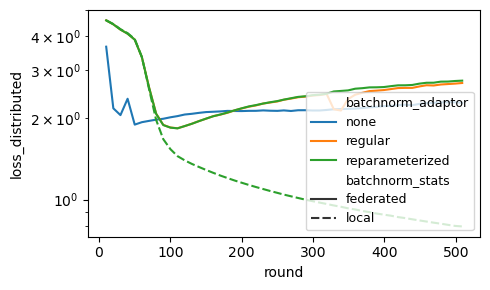

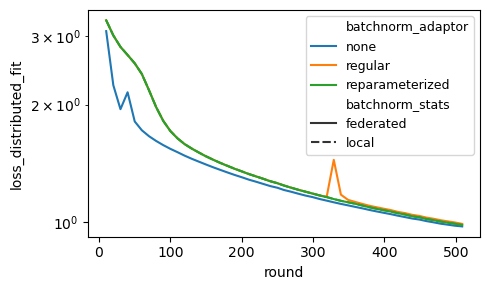

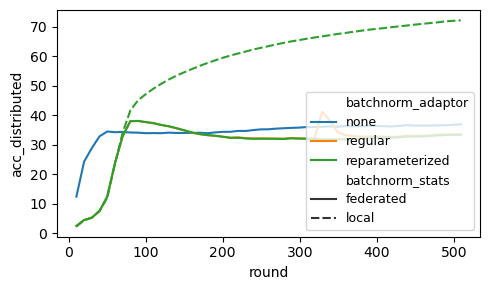

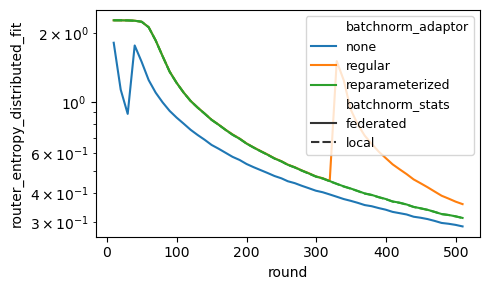

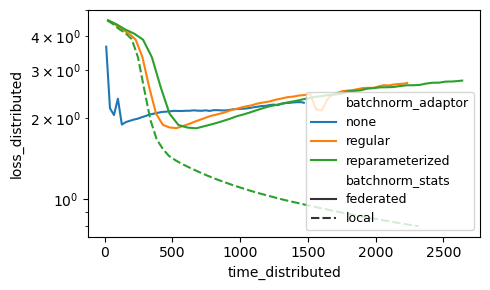

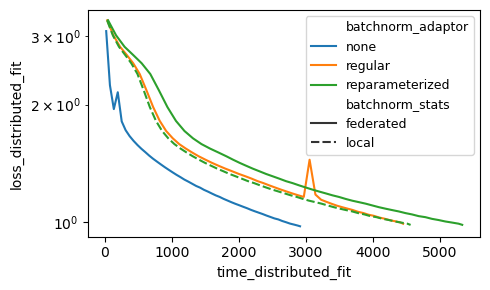

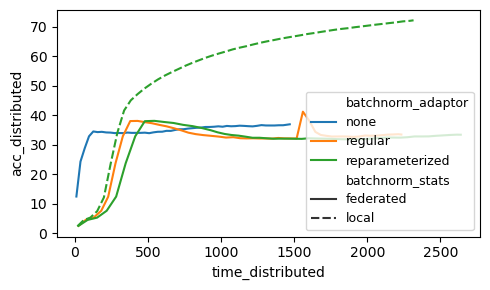

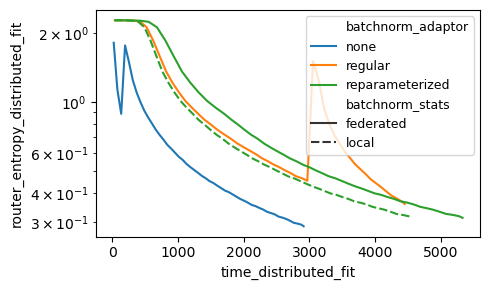

In [ ]:
for index, metric, mode in product(INDICES, METRICS, MODES):
    x = index if index == "round" else f"{index}_{mode}"
    y = f"{metric}_{mode}"
    if x not in history_df.columns or y not in history_df.columns:
        continue
    history_df = history_df.dropna(subset=x)
    if len(history_df) == 0 or history_df[y].sum() == 0.0:
        continue
    fig, ax = plt.subplots(1)
    sns.lineplot(x=x, y=y, data=history_df, ax=ax, errorbar="sd", **plot_opts)
    ax.legend(prop={'size': LEGEND_SIZE})
    if "acc" not in y:
        ax.set_yscale('log')
    fig.tight_layout()
    plt.savefig(os.path.join(results_dir, f"{y}_given_{x}.pdf"))

### Best loss

In [ ]:
# x, y = "round", "loss_distributed"
# last_round_df = history_df[history_df[x] == history_df[x].max()]
# best_round_df = last_round_df[last_round_df[y] == last_round_df[y].min()]
# print(best_round_df["method"].item())
# display(best_round_df)

### Best metric

In [ ]:
history_df["total_time"] = history_df["time_distributed"] + history_df["time_distributed_fit"]
for metric in METRICS:
    x, y = "round", f"{metric}_distributed"
    if y not in history_df.columns:
        continue
    minimize = "loss" in y  # should be checked case by case, but usually a minimize objective has 'loss' in it
    last_round = history_df[x].max()  # take min of max
    last_values_df = history_df[history_df[x] == last_round]  # get last values
    ranked_last_values_df = last_values_df[[*variables, y, "total_time"]].sort_values(y, ascending=minimize)
    ranked_last_values_df.to_csv(os.path.join(results_dir, f"{y}.csv"))
    print(y)
    display(ranked_last_values_df)
    # best_value = last_values_df[y].min() if minimize else last_values_df[y].max()
    # display(last_values_df[last_values_df[y] == best_value][variables])

loss_distributed


,batchnorm_adaptor,batchnorm_stats,loss_distributed,total_time
152,reparameterized,local,0.796264,6880.220578
50,none,federated,2.274730,4384.618668
203,regular,federated,2.692024,6685.251123
101,reparameterized,federated,2.746314,7972.584977


acc_distributed


,batchnorm_adaptor,batchnorm_stats,acc_distributed,total_time
152,reparameterized,local,72.216,6880.220578
50,none,federated,36.954,4384.618668
203,regular,federated,33.490,6685.251123
101,reparameterized,federated,33.418,7972.584977


In [ ]:
history_df[history_df[x] == history_df[x].max()]  # get last values

,round,loss_distributed,acc_distributed,loss_distributed_fit,router_entropy_distributed_fit,time_distributed,time_distributed_fit,identifier,task,method,...,bias,lora,convlora,embeddinglora,normlora,convlora_method,normlora_reparam,batchnorm_stats,batchnorm_adaptor,total_time
50,509,2.274730,36.954,0.973756,0.287318,1469.996474,2914.622193,sweep,cifar100_bn,floral,...,True,True,True,False,False,balanced_2d,True,federated,none,4384.618668
101,509,2.746314,33.418,0.982213,0.312783,2638.967095,5333.617882,sweep,cifar100_bn,floral_normlora_reparam,...,True,True,True,False,True,balanced_2d,True,federated,reparameterized,7972.584977
152,509,0.796264,72.216,0.981619,0.312523,2316.267990,4563.952588,sweep,cifar100_bn,floral_normlora_reparam,...,True,True,True,False,True,balanced_2d,True,local,reparameterized,6880.220578
203,509,2.692024,33.490,0.988362,0.359237,2232.873811,4452.377312,sweep,cifar100_bn,floral_normlora,...,True,True,True,False,True,balanced_2d,False,federated,regular,6685.251123
